In [1]:
import os
import scipy
import numpy as np
import pandas as pd
import sympy as sp
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

# 忽略所有警告
import warnings
warnings.simplefilter("ignore")

In [2]:
root = "./"
data_folder = os.path.join(root, "datasets/")

# 1. Corn Price

In [3]:
corn_folder = os.path.join(data_folder, "Weekly_corn_price/")
corn_13_17_path = os.path.join(corn_folder, "corn2013-2017.txt")
corn_15_17_path = os.path.join(corn_folder, "corn2015-2017.txt")
OHLC_13_17_path = os.path.join(corn_folder, "corn_OHLC2013-2017.txt")

## 1.1 读取数据

In [4]:
corn_13_17 = pd.read_csv(corn_13_17_path, header=None)
corn_13_17.columns = ["Date", "Price"]

corn_15_17 = pd.read_csv(corn_15_17_path, header=None)
corn_15_17.columns = ["Date", "Price"]

OHLC_13_17 = pd.read_csv(OHLC_13_17_path, header=None)
OHLC_13_17.columns = ["Date", "Open Price", "High Price", "Low Price", "Close Price"]

In [5]:
OHLC_13_17.head(5)

,Date,Open Price,High Price,Low Price,Close Price
0,2013-01-06,7.859275,7.900275,7.751150,7.794975
1,2013-01-13,7.801200,7.927280,7.757640,7.863400
2,2013-01-20,8.196460,8.277900,8.156880,8.234920
3,2013-01-27,8.205650,8.252325,8.135675,8.176650
4,2013-02-03,8.274520,8.355340,8.236040,8.317480


## 1.2 将日期处理成整数（以2013-01-06为第0天）

In [6]:
def ProcessDate(table: pd.DataFrame):
    start_date = pd.to_datetime("2013-01-06")
    tmp_df = table.copy()
    tmp_df["Date"] = ((pd.to_datetime(tmp_df["Date"]) - start_date)/pd.Timedelta(1, "D")).astype(int)

    return tmp_df

In [7]:
corn_13_17 = ProcessDate(corn_13_17)
corn_15_17 = ProcessDate(corn_15_17)
OHLC_13_17 = ProcessDate(OHLC_13_17)

In [8]:
OHLC_13_17.head(5)

,Date,Open Price,High Price,Low Price,Close Price
0,0,7.859275,7.900275,7.751150,7.794975
1,7,7.801200,7.927280,7.757640,7.863400
2,14,8.196460,8.277900,8.156880,8.234920
3,21,8.205650,8.252325,8.135675,8.176650
4,28,8.274520,8.355340,8.236040,8.317480


## 1.3 数据可视化

### 1.3.1 走势图

In [9]:
def PlotTable(table: pd.DataFrame, title):
    columns = table.columns
    dates = table[columns[0]]

    colors = ["red", "orange", "green", "blue", "purple", "black"]

    plt.figure(figsize = (10, 5))
    plt.title("Visualization of %s"%(title))
    for i, item in enumerate(columns[1:]):
        plt.plot(dates, table[item], "-", color = colors[i], label = item)
    plt.legend()
    plt.grid(True)
    plt.xlabel("Dates")
    plt.ylabel("Value")
    plt.show()

    if(len(columns) > 2):
        corr = table.iloc[:, 1:].corr()
        plt.Figure(figsize = (5, 5))
        plt.title("Heatmap of %s"%(title))
        sns.heatmap(corr)
        plt.show()

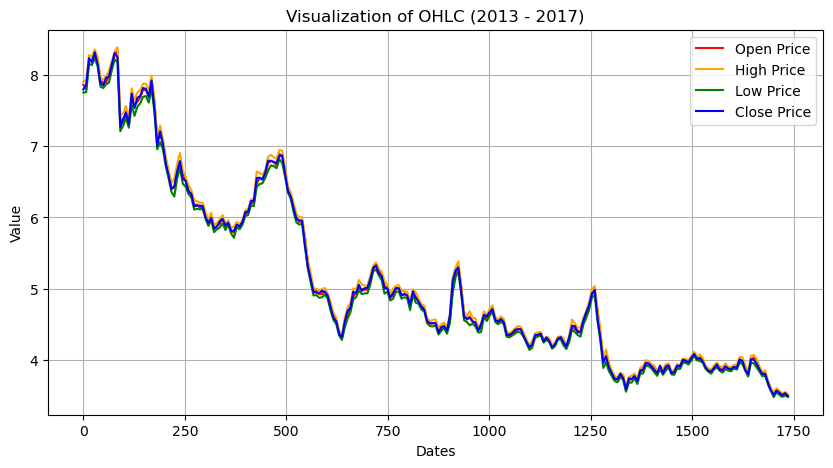

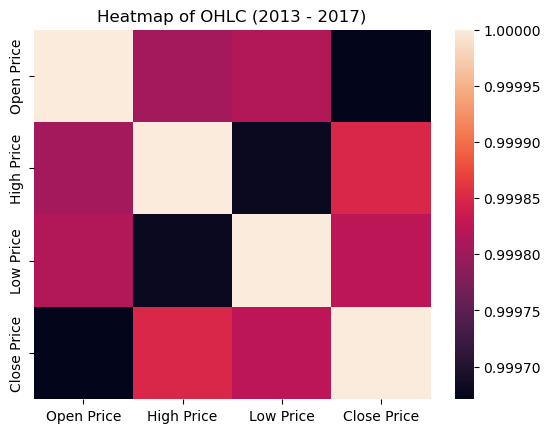

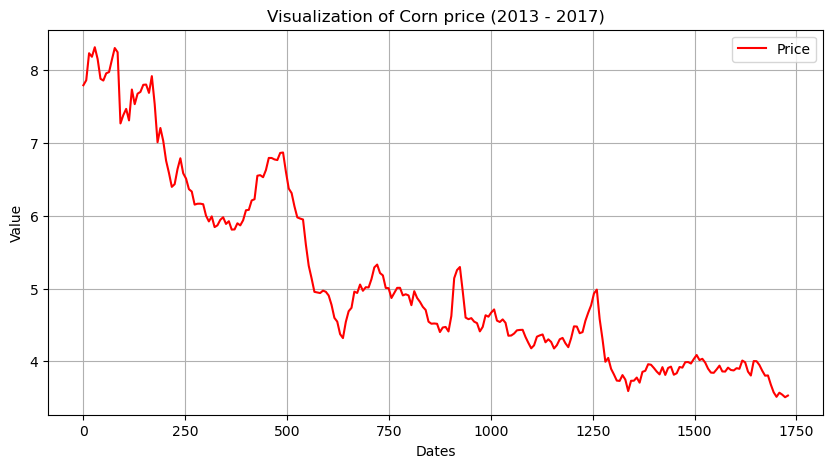

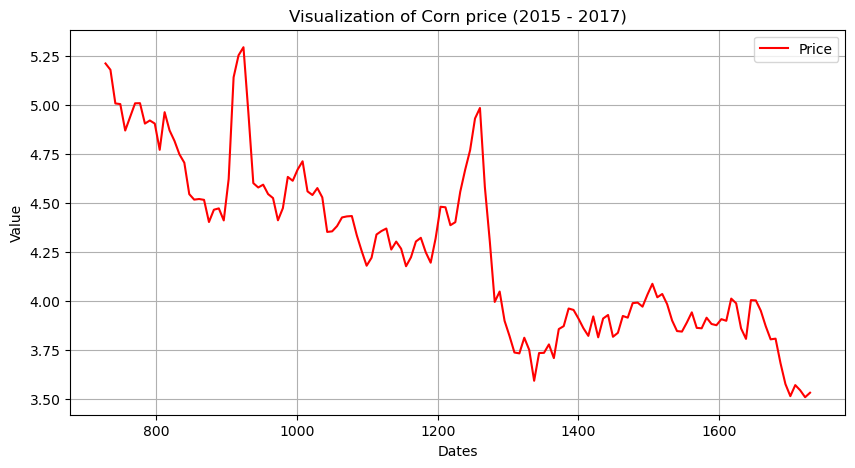

In [10]:
PlotTable(OHLC_13_17, "OHLC (2013 - 2017)")
PlotTable(corn_13_17, "Corn price (2013 - 2017)")
PlotTable(corn_15_17, "Corn price (2015 - 2017)")

### 1.3.2 看每日的波动

第$t$周的变化率：

$\Delta Price(t) = \frac{Price(t) - Price(t - 1)}{Price(t - 1)}$

$\Delta HighPrice(t) = \frac{HighPrice(t) - Price(t)}{Price(t)}$

$\Delta LowPrice(t) = \frac{LowPrice(t) - Price(t)}{Price(t)}$

$\Delta OpenPrice(t) = \frac{OpenPrice(t) - Price(t)}{Price(t)}$

$\Delta ClosePrice(t) = \frac{ClosePrice(t) - Price(t)}{Price(t)}$

In [11]:
delta_price = corn_13_17.copy()
delta_price.columns = ["Date", "Delta Price"]
delta_price["Delta Price"][0] = 0
delta_price["Delta Price"][1:] = np.array(corn_13_17["Price"][1:]) - np.array(corn_13_17["Price"][:-1])

In [12]:
price_diff = OHLC_13_17.copy().iloc[:-1, :]
column = ["Date"]
column.extend(["Delta " + name for name in price_diff.columns[1:]])
price_diff.columns = column
for col in price_diff.columns[1:]:
    price_diff[col] = (price_diff[col] - corn_13_17["Price"])/corn_13_17["Price"]

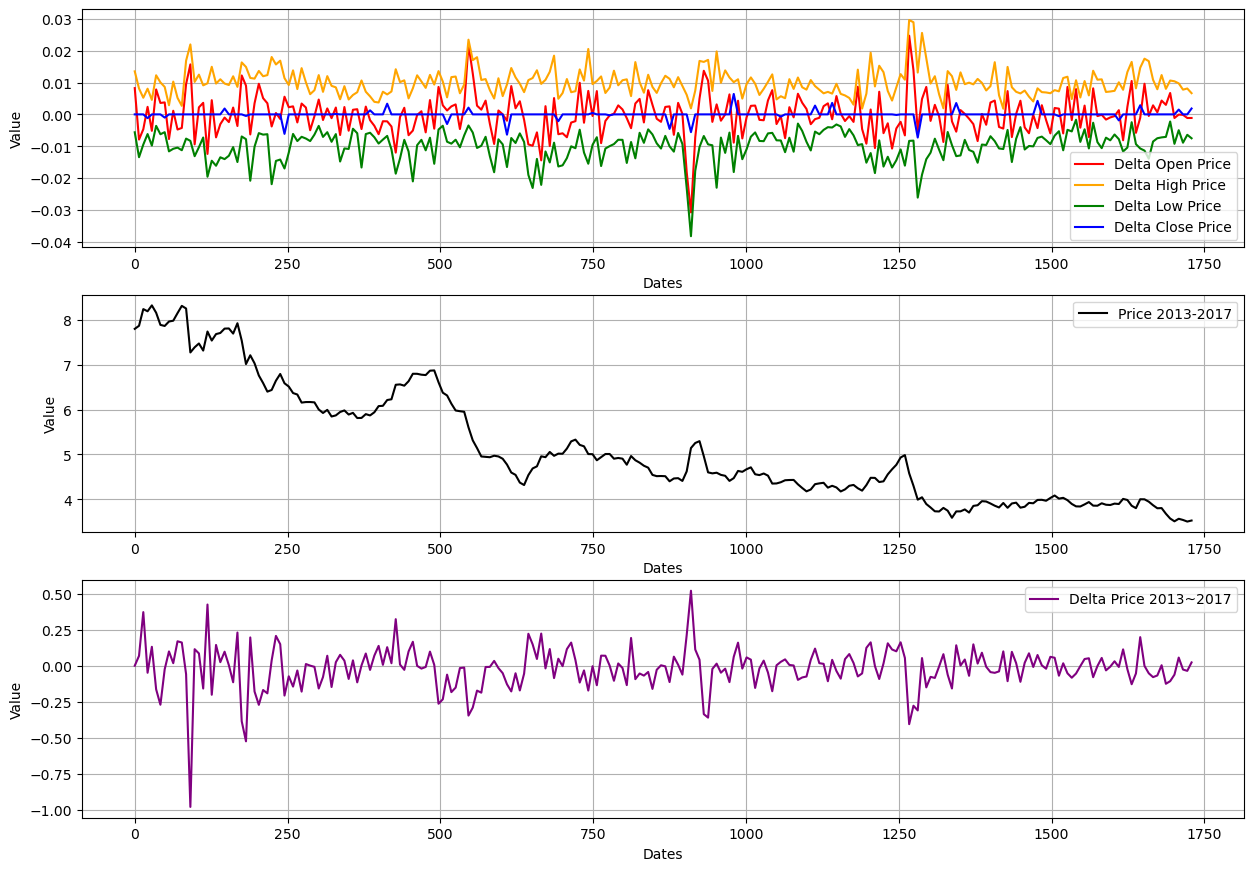

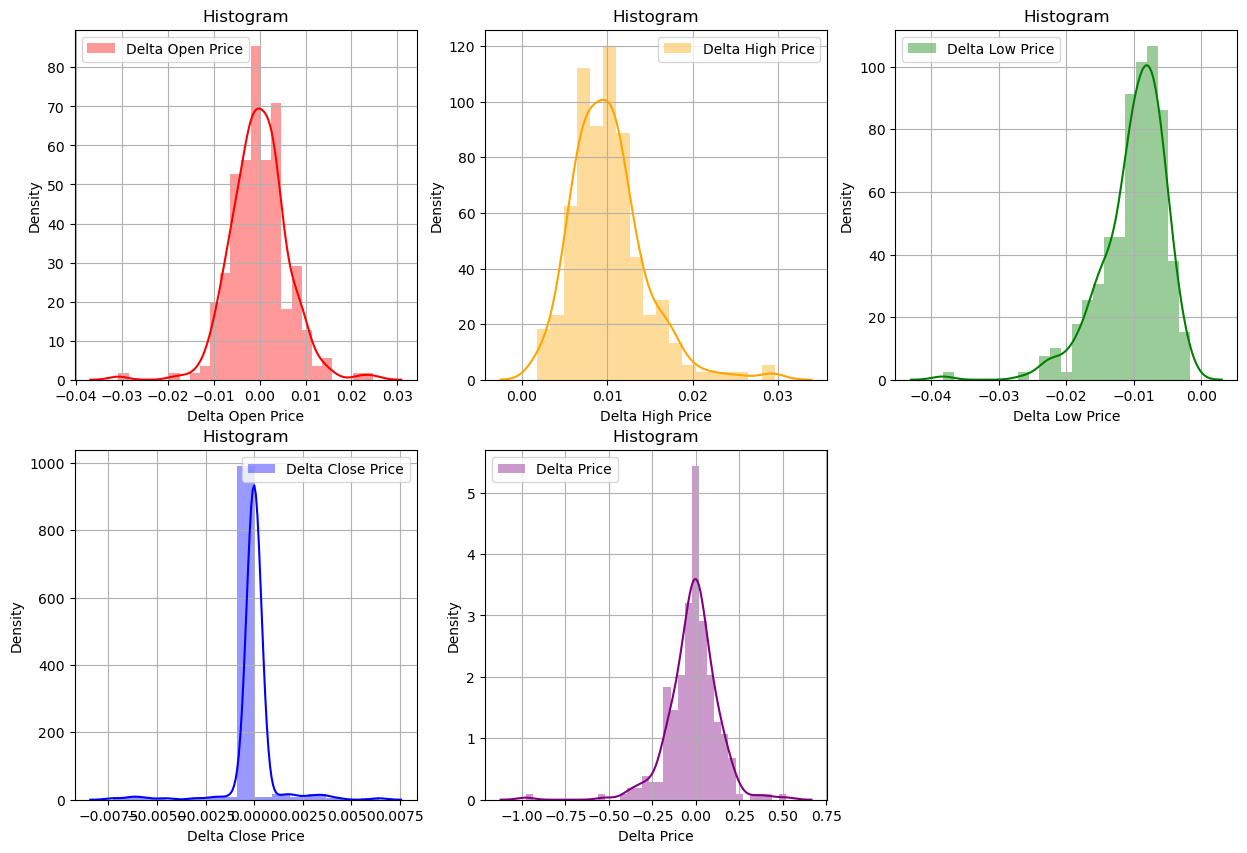

In [13]:
columns = price_diff.columns
dates = price_diff["Date"]

colors = ["red", "orange", "green", "blue", "purple", "black"]

plt.figure(figsize = (15, 14*3/4))
plt.subplot(3,1,1)
for i, item in enumerate(columns[1:]):
    plt.plot(dates, price_diff[item], "-", color = colors[i], label = item)
plt.legend()
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Value")

plt.subplot(3,1,2, sharex=plt.gca())
plt.plot(dates, corn_13_17["Price"], "-", color = "black", label = "Price 2013-2017")
plt.legend()
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Value")

plt.subplot(3,1,3, sharex=plt.gca())
plt.plot(dates, delta_price["Delta Price"], "-", color = "purple", label = "Delta Price 2013~2017")
plt.legend()
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Value")

plt.show()

plt.figure(figsize = (15, 10))
for i, item in enumerate(columns[1:]):
    plt.subplot(2, 3, i+1)
    plt.title("Histogram")
    sns.distplot(price_diff[item], color = colors[i], label = item)
    plt.legend()
    plt.grid(True)
plt.subplot(2, 3, 5) 
plt.title("Histogram")
sns.distplot(delta_price["Delta Price"], color = "purple", label = "Delta Price")
plt.legend()
plt.grid(True)

plt.show()

## 1.4 建模

但看纯粹的玉米价格走势，感觉做一个统计模型很没有意义，最多就是用指数函数拟合一下玉米价格。

于是我开始考虑一个问题：玉米价格有涨有跌，那能否做一个模型来判断当前阶段应该买入还是卖出？转换一下问题，也就是根据当前时刻的开盘价、收盘价、最高价、最低价和价格，来判断此时的玉米价格是处于上升状态还是下降状态？上升状态就可以买入，下降状态就应该卖出。而上升状态和下降状态是不可观测的，属于隐变量。因此很自然地，我们就可以使用因马尔科夫模型来做估计。

隐状态$S$有两个：上升状态$S = 0$和下降状态$S = 1$。

可观测的状态有5个：$\alpha^{(t)} = \Delta OpenPrice(t), \beta^{(t)} = \Delta ClosePrice(t), \delta^{(t)} = \Delta HighPrice(t), \eta^{(t)} = \Delta LowPrice(t), \gamma^{(t)} = \Delta Price(t)$。

其中，$\alpha, \beta, \gamma$服从正态分布先验，$\mu, -\eta$服从卡方分布先验。

In [16]:
df_column = ["Date", "alpha", "beta", "gamma", "delta", "eta"]
df_data = pd.DataFrame(np.zeros((price_diff.shape[0], 6)))
df_data.columns = df_column
df_data["Date"] = price_diff["Date"]
df_data["alpha"] = price_diff["Delta Open Price"]
df_data["beta"] = price_diff["Delta Close Price"]
df_data["delta"] = price_diff["Delta High Price"]
df_data["eta"] = price_diff["Delta Low Price"]
df_data["gamma"] = delta_price["Delta Price"]
#df_data = df_data.set_index(price_diff["Date"])
df_data

,Date,alpha,beta,gamma,delta,eta
0,0,0.008249,0.000000,0.000000,0.013509,-0.005622
1,7,-0.007910,0.000000,0.068425,0.008124,-0.013450
2,14,-0.004670,0.000000,0.371520,0.005219,-0.009477
3,21,0.002369,-0.001174,-0.048660,0.008070,-0.006179
4,28,-0.005165,0.000000,0.131220,0.004552,-0.009791
...,...,...,...,...,...,...
243,1701,-0.001139,0.000000,-0.062000,0.010391,-0.009253
244,1708,-0.000070,0.001506,0.056500,0.009737,-0.004973
245,1715,-0.000141,0.000000,-0.026500,0.007763,-0.008892
246,1722,-0.001141,0.000000,-0.035500,0.008127,-0.006416


In [ ]:
class HMM():
    def __init__(self, data) -> None:
        self.state = np.array([0, 1])
        self.data = data
        self.Date = np.array(data["Date"])
        self.alpha = np.array(data["alpha"])
        self.beta = np.array(data["beta"])
        self.gamma = np.array(data["gamma"])
        self.delta = np.array(data["delta"])
        self.eta = np.array(data["eta"])

        self.PS = 1/2*np.ones((self.Date.shape[0], self.state.shape[0]))

        self.A = 1/2*np.ones((2, 2))
        self.start_prob = 1/2*np.ones(2)
    
    def 

## 1.5 模型估计